In [2]:
#loading packages 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
%matplotlib inline
#import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call


# Importing the Data 
    - using the pandas read_csv command 
    - using head() to ensure the data was imported properly into a dataframe 

In [3]:
m = pd.read_csv("C:\\Users\\nelso\\Desktop\\music_genre.csv")

In [4]:
m.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


# Handling Missing Values To Do: 
    - in tempo: ? seems to indicate a missing value
        - replace missing value with the average of that music_genre
            - find each instance of music[music['tempo']] == '?' where music['music_genre'] == 'Electronic'
            - remove these instances and replace with NaN
            - find the mean of duration_ms for where music['music_genre'] == 'Electronic'
            - replace NaN values with the mean 
            *repeat for each music genre* 
    - in duration_ms: -1.0 seems to indicate a missing value 
        - replace missing value with the average of that music_genre
            - find each instance of music[music['duration_ms']] == -1.0 where music['music_genre'] == 'Electronic'
            - remove these instances and replace with NaN
            - find the mean of duration_ms for where music['music_genre'] == 'Electronic'
            - replace NaN values with the mean 
            *repeat for each music genre* 
            
    - change duration_ms to seconds for easier readability and interpretability 
    - Re-Index the columns/ instance ID does not have any value 
    - What if we put the dataframe in order of instance ID? It would no longer organize the songs by music_genre so as to better randomize them 
        

In [5]:
#making sure that tempo and duration_ms are float or int values so that we can compute the mean of them 
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

tempo is an object, therefore we need to change it to a float before we can move forward, however we cannot change it to a float until we change the ? to NaN values 

In [6]:
#replacing ? in tempo with NaN value
m['tempo'] = m['tempo'].replace({"?":np.nan})
#checking to make sure that it worked, good to go 
m.head(6)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.85400,D,0.216,-10.517,Minor,0.0412,NaN,4-Apr,0.614,Electronic


In [7]:
#replacing -1 with NaN in duration_ms and checking to make sure it worked with head()
m['duration_ms'] = m['duration_ms'].replace({-1:np.nan})
m.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,NaN,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [8]:
#now that the ? in tempo are NaN values we can change the tempo values to float  
m['tempo'] = m['tempo'].astype(float)

In [9]:
#checking to ensure the changes were made
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       45061 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

looks good to go! All of the columns that are data objects are categorical in nature and will not be used for calculations

In [10]:
# creating a sub-dataframe of each genre of music so that we can get the means of tempo and duration_ms for each 

In [11]:
#finding exact names and spellings of each one 
m.music_genre.unique()

array(['Electronic', 'Anime', nan, 'Jazz', 'Alternative', 'Country',
       'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [12]:
#creating 10 new dataframes of each genre because it made it easier to take the means 
    # i was having trouble taking the means using music_genre  == genre so decided to add this extra step to
        #make it easier for myself (even though it made it longer for myself)

music_elect = m[m['music_genre']=='Electronic']

music_anime = m[m['music_genre']=='Anime']

music_jazz = m[m['music_genre']=='Jazz']

music_alt = m[m['music_genre']=='Alternative']

music_country = m[m['music_genre']=='Country']

music_rap = m[m['music_genre']=='Rap']

music_blues = m[m['music_genre']=='Blues']

music_rock = m[m['music_genre']=='Rock']

music_class = m[m['music_genre']=='Classical']

music_hip = m[m['music_genre']=='Hip-Hop']

In [13]:
#finding the mean of duration_ms and tempo for each genre 

#Electronic 
elect_dur_mean = music_elect.duration_ms.mean()
elect_tempo_mean = music_elect.tempo.mean()

#Anime
anime_dur_mean = music_anime.duration_ms.mean()
anime_tempo_mean = music_anime.tempo.mean()

#Jazz
jazz_dur_mean = music_jazz.duration_ms.mean()
jazz_tempo_mean = music_jazz.tempo.mean()

#Alternative
alt_dur_mean = music_alt.duration_ms.mean()
alt_tempo_mean = music_alt.tempo.mean()

#Country 
country_dur_mean = music_country.duration_ms.mean()
country_tempo_mean = music_country.tempo.mean()

#Rap
rap_dur_mean = music_rap.duration_ms.mean()
rap_tempo_mean = music_rap.tempo.mean()

#Blues
blues_dur_mean = music_blues.duration_ms.mean()
blues_tempo_mean = music_blues.tempo.mean()

#Rock
rock_dur_mean = music_rock.duration_ms.mean()
rock_tempo_mean = music_rock.tempo.mean()

#Classical
class_dur_mean = music_class.duration_ms.mean()
class_tempo_mean = music_class.tempo.mean()

#Hip-Hop
hip_dur_mean = music_hip.duration_ms.mean()
hip_tempo_mean = music_hip.tempo.mean()

#checking some random ones to make sure they look like they make sense 

print('hip duration',hip_dur_mean, 'electronic tempo', elect_tempo_mean, 'classical duration', class_dur_mean, 'blues tempo',
      blues_tempo_mean)

hip duration 219951.26807095343 electronic tempo 125.93057075682948 classical duration 309661.8941857875 blues tempo 121.379961521253


In [14]:
#testing out the method of replacing to make sure that it works 

elect_fill_values = {"tempo": elect_tempo_mean, "duration_ms":elect_dur_mean}
music_elect = music_elect.fillna(value=elect_fill_values)

In [15]:
music_elect.head(10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,270703.43126,0.941,0.792000,A#,0.1150,-5.201,Minor,0.0748,100.889000,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.00000,0.890,0.950000,D,0.1240,-7.043,Minor,0.0300,115.002000,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.00000,0.755,0.011800,G#,0.5340,-4.617,Major,0.0345,127.994000,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.00000,0.700,0.002530,C#,0.1570,-4.498,Major,0.2390,128.014000,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.00000,0.587,0.909000,F#,0.1570,-6.266,Major,0.0413,145.036000,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.00000,0.731,0.854000,D,0.2160,-10.517,Minor,0.0412,125.930571,4-Apr,0.614,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.00000,0.803,0.000008,B,0.1060,-4.294,Major,0.3510,149.995000,4-Apr,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.00000,0.706,0.903000,G,0.0635,-9.339,Minor,0.0484,120.008000,4-Apr,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.00000,0.921,0.000276,F,0.1780,-3.175,Minor,0.2680,149.948000,4-Apr,0.273,Electronic
9,56950.0,Shlump,Lazer Beam,22.0,0.00934,0.578,204800.00000,0.731,0.011200,A,0.1110,-7.091,Minor,0.1730,139.933000,4-Apr,0.203,Electronic


looks good! Lets go ahead and do this for each tempo and duration for each sub-dataframe then we're going to concanate the dataframes back together to be music again 

In [16]:
#replacing NaN in each sub-dataframe with the appropriate mean values 

#Electronic 
elect_fill_values = {"tempo": elect_tempo_mean, "duration_ms":elect_dur_mean}
music_elect = music_elect.fillna(value=elect_fill_values)
                       
#Anime
anime_fill_values = {"tempo": anime_tempo_mean, "duration_ms":anime_dur_mean}
music_anime = music_anime.fillna(value=anime_fill_values)

#Jazz
jazz_fill_values = {"tempo": jazz_tempo_mean, "duration_ms":jazz_dur_mean}
music_jazz = music_jazz.fillna(value=jazz_fill_values)

#Alternative
alt_fill_values = {"tempo": alt_tempo_mean, "duration_ms":alt_dur_mean}
music_alt = music_alt.fillna(value=alt_fill_values)

#Country 
country_fill_values = {"tempo": country_tempo_mean, "duration_ms":country_dur_mean}
music_country = music_country.fillna(value=country_fill_values)

#Rap
rap_fill_values = {"tempo": rap_tempo_mean, "duration_ms":rap_dur_mean}
music_rap = music_rap.fillna(value=rap_fill_values)

#Blues
blues_fill_values = {"tempo": blues_tempo_mean, "duration_ms":blues_dur_mean}
music_blues = music_blues.fillna(value=blues_fill_values)

#Rock
rock_fill_values = {"tempo": rock_tempo_mean, "duration_ms":rock_dur_mean}
music_rock = music_rock.fillna(value=rock_fill_values)

#Classical
class_fill_values = {"tempo": class_tempo_mean, "duration_ms":class_dur_mean}
music_class = music_class.fillna(value=class_fill_values)

#Hip-Hop
hip_fill_values = {"tempo": hip_tempo_mean, "duration_ms":hip_dur_mean}
music_hip = music_hip.fillna(value=hip_fill_values)

# Stack subset dataframes on top of one another to recreate the original dataset  

In [17]:
music_subsets = (music_elect, music_anime, music_jazz, music_alt, music_country, 
                     music_rap, music_blues, music_rock, music_class, music_hip)

#m01 is df with no missing values after replacing each with the mean of that genre 
m01 = pd.concat(music_subsets)


In [18]:
#validating that all the rows are accounted for! Looks good to go  
m01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

# Sorting by instance_ID 

In [19]:
m03 = m01.sort_values(by='instance_id')
m03

#why did we lose some values here? also when I go into excel theyre not the same as the instance_id values there?

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
12615,20002.0,empty_field,Amazing Grace,45.0,0.87500,0.212,648827.0,0.245,0.005270,G#,0.4060,-16.939,Major,0.0455,88.426000,3-Apr,0.178,Jazz
2444,20005.0,Bassnectar,Hot Right Now (Bassnectar Remix),30.0,0.04770,0.345,257829.0,0.911,0.001170,G,0.1240,-5.668,Major,0.1540,175.004000,4-Apr,0.148,Electronic
29922,20007.0,Chief Keef,Nobody (feat. Kanye West),50.0,0.44600,0.747,251588.0,0.537,0.000000,C#,0.1940,-8.749,Minor,0.0642,116.533000,4-Apr,0.313,Rap
37109,20008.0,Fleetwood Mac,Seven Wonders - Early Version; 2017 Remaster,54.0,0.04480,0.675,274253.0,0.527,0.000003,D#,0.1010,-9.501,Major,0.0263,113.881000,4-Apr,0.660,Rock
45030,20009.0,Webbie,Six 12's (feat. Mouse On Tha Track),57.0,0.02760,0.667,241040.0,0.703,0.000000,E,0.2680,-5.347,Minor,0.1520,85.476000,4-Apr,0.518,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13618,91753.0,Chris Botti,Are You Lonesome Tonight? (feat. Paul Buchanan),35.0,0.92700,0.346,240120.0,0.051,0.000130,G,0.1110,-17.526,Major,0.0370,111.699415,4-Apr,0.128,Jazz
30145,91754.0,Jethro Tull,Locomotive Breath,56.0,0.41200,0.693,266013.0,0.528,0.003550,B,0.0563,-13.094,Minor,0.0855,121.379962,4-Apr,0.339,Blues
20551,91757.0,Laura Bell Bundy,Giddy On Up,41.0,0.26900,0.753,208067.0,0.815,0.000094,D,0.1010,-2.830,Major,0.0320,108.016000,4-Apr,0.661,Country
8004,91758.0,empty_field,Trauma,33.0,0.00207,0.603,256367.0,0.958,0.002070,A#,0.3060,-4.821,Major,0.0395,128.821000,4-Apr,0.796,Anime


In [20]:
# m02 is df after dropping instance_id, artist_name, track_name and obtained date
    #also dropped key and mode since were going to change those to dummies and add them to this df 
m02 = m01[['popularity', 'acousticness', 'danceability', 
                     'duration_ms', 'energy', 'instrumentalness', 
                     'liveness', 'loudness','speechiness', 
                     'tempo','valence', 'music_genre']]
m02.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,270703.43126,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.00000,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.00000,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.00000,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.00000,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323,Electronic


# Creating Dummy Variables for Key and Mode

In [21]:
# Dummy Encoding Key and Mode 
key_dummy = pd.get_dummies(m01['key'])

mode_dummy = pd.get_dummies(m01['mode'])

In [22]:
#adding the dummy dfs back to the other dataframes 
m04 = pd.concat((m02, key_dummy, mode_dummy), axis = 1)
m04.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,C#,D,D#,E,F,F#,G,G#,Major,Minor
0,27.0,0.00468,0.652,270703.43126,0.941,0.79200,0.115,-5.201,0.0748,100.889,...,0,0,0,0,0,0,0,0,0,1
1,31.0,0.01270,0.622,218293.00000,0.890,0.95000,0.124,-7.043,0.0300,115.002,...,0,1,0,0,0,0,0,0,0,1
2,28.0,0.00306,0.620,215613.00000,0.755,0.01180,0.534,-4.617,0.0345,127.994,...,0,0,0,0,0,0,0,1,1,0
3,34.0,0.02540,0.774,166875.00000,0.700,0.00253,0.157,-4.498,0.2390,128.014,...,1,0,0,0,0,0,0,0,1,0
4,32.0,0.00465,0.638,222369.00000,0.587,0.90900,0.157,-6.266,0.0413,145.036,...,0,0,0,0,0,1,0,0,1,0


In [30]:
m04_x_z= pd.concat((x_z, key_dummy, mode_dummy), axis = 1)
m04_x_z.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,C#,D,D#,E,F,F#,G,G#,Major,Minor
0,-1.108003,-0.883886,0.524878,0.237242,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.654250,...,0,0,0,0,0,0,0,0,0,1
1,-0.850633,-0.860390,0.356933,-0.256473,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170099,...,0,1,0,0,0,0,0,0,0,1
2,-1.043661,-0.888632,0.345737,-0.281719,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.275596,...,0,0,0,0,0,0,0,1,1,0
3,-0.657606,-0.823184,1.207853,-0.740840,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.276282,...,1,0,0,0,0,0,0,0,1,0
4,-0.786291,-0.883974,0.446504,-0.218077,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.860227,...,0,0,0,0,0,1,0,0,1,0


# Splitting into target and predictor (x and y)

In [24]:
m04.columns.values

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'music_genre', 'A', 'A#', 'B',
       'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'Major', 'Minor'],
      dtype=object)

In [25]:
#m04_x and m04_y is m02 split into the target and predictor variables 

m04_x = m04[['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'A', 'A#', 'B',
       'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'Major', 'Minor']]
m04_y = m04[['music_genre']]

In [26]:
#lets check out each to make sure they look good! 
m04_x.columns.values

array(['popularity', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'A', 'A#', 'B', 'C', 'C#', 'D',
       'D#', 'E', 'F', 'F#', 'G', 'G#', 'Major', 'Minor'], dtype=object)

In [27]:
m04_y.columns.values

array(['music_genre'], dtype=object)

# Standardizing predictor variables 

In [28]:
#all of them are float values so we can standardize them 
m04_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   liveness          50000 non-null  float64
 7   loudness          50000 non-null  float64
 8   speechiness       50000 non-null  float64
 9   tempo             50000 non-null  float64
 10  valence           50000 non-null  float64
 11  A                 50000 non-null  uint8  
 12  A#                50000 non-null  uint8  
 13  B                 50000 non-null  uint8  
 14  C                 50000 non-null  uint8  
 15  C#                50000 non-null  uint8  
 16  D                 50000 non-null  uint8 

In [29]:
#create a df with standardized variables, but without the dummy variables, we need to add those back in!!

x_z= pd.DataFrame(stats.zscore(m04_x[['popularity', 'acousticness', 'danceability','duration_ms','energy',
                                     'instrumentalness', 'liveness', 'loudness','speechiness',
                                     'tempo','valence']]), columns = ['popularity', 'acousticness', 'danceability','duration_ms','energy',
                                     'instrumentalness', 'liveness', 'loudness','speechiness',
                                     'tempo','valence'])
x_z

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-1.108003,-0.883886,0.524878,0.237242,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.654250,1.225073
1,-0.850633,-0.860390,0.356933,-0.256473,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170099,0.302431
2,-1.043661,-0.888632,0.345737,-0.281719,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.275596,-0.498812
3,-0.657606,-0.823184,1.207853,-0.740840,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.276282,-0.753752
4,-0.786291,-0.883974,0.446504,-0.218077,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.860227,-0.539278
...,...,...,...,...,...,...,...,...,...,...,...
50000,0.950954,-0.799746,1.985998,-0.240852,-0.097351,-0.558074,-0.463366,0.342655,2.016466,-0.752397,-0.510952
50001,1.787405,-0.437640,0.843973,0.059734,-0.898692,-0.558074,-0.525234,-0.110376,-0.380642,0.071445,-1.389081
50002,0.436214,-0.880107,0.754403,-0.527868,0.617052,-0.558074,-0.314884,0.598865,0.517041,0.381427,-0.247918
50003,1.337008,-0.654142,1.252639,0.162536,-0.482901,-0.558074,-0.543794,0.668150,-0.488166,-1.511986,-0.413831


In [31]:
#adding the standardized variables into a df back with the dummy variables 
m04_x_z = pd.concat((x_z,key_dummy, mode_dummy), axis = 1)
m04_x_z.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,C#,D,D#,E,F,F#,G,G#,Major,Minor
0,-1.108003,-0.883886,0.524878,0.237242,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.654250,...,0,0,0,0,0,0,0,0,0,1
1,-0.850633,-0.860390,0.356933,-0.256473,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170099,...,0,1,0,0,0,0,0,0,0,1
2,-1.043661,-0.888632,0.345737,-0.281719,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.275596,...,0,0,0,0,0,0,0,1,1,0
3,-0.657606,-0.823184,1.207853,-0.740840,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.276282,...,1,0,0,0,0,0,0,0,1,0
4,-0.786291,-0.883974,0.446504,-0.218077,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.860227,...,0,0,0,0,0,1,0,0,1,0


# Splitting into training and testing (and target and predictor variables)

I standardized everything before I split them, I remember we spoke about not knowing for sure if thats correct or not does anyone have some input?


- i researched a bit and found that an 80/20 split for training and testing is common 
    - apparently there is no "optimal" split percentage it's just based on what your goals and constraints are. Since we aren't worried about the computation time for training or testing since our dataset is relatively small 80/20 should be fine for us 
https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [32]:
#choosing a 80/20 split , setting a seed at 7 for reproducability 

m_x_train, m_x_test = train_test_split(m04_x_z, test_size = 0.20, random_state = 7)

m_y_train, m_y_test = train_test_split(m04_y, test_size = 0.20, random_state = 7)

In [33]:
##RF - training

#isolating predictor/target variables
predictors = m_x_train[['popularity', 'loudness','acousticness','tempo']]

target = m_y_train
                   
#implement RF9
rf_target = np.ravel(target) #1D array for response variable
rf_predictors = np.ravel(predictors)
#print(rf_predictors)

rf01 = RandomForestClassifier(n_estimators=100, criterion="gini").fit(predictors,rf_target)


##RF - testing

#isolating predictor/target variables
predictors_test = m_x_test[['popularity', 'loudness','acousticness','tempo']]
target_test = m_y_test

#implement RF
rf_target_test = np.ravel(target_test) #1D array for response variable
rf_predictors_test = np.ravel(predictors_test)

### Test Random Forest Model

predict = rf01.predict(predictors_test)
predict
#crosstab = pd.crosstab(predict,rf_target_test)
#print(crosstab)



array(['Rap', 'Hip-Hop', 'Hip-Hop', ..., 'Electronic', 'Country', 'Jazz'],
      dtype=object)

The accuracy of the Random Forest Model is: 
0.4404


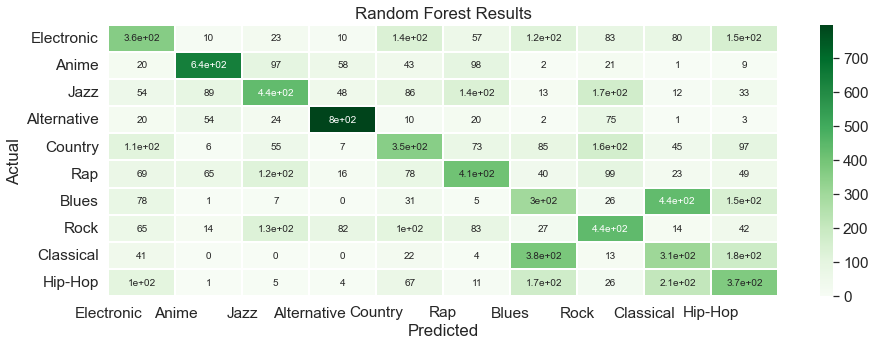

In [44]:
#accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

#### accuracy score
accuracy = accuracy_score(m_y_test, predict)
print("The accuracy of the Random Forest Model is: ")
print(accuracy)

### confusion matrix
confus_matrix = confusion_matrix(m_y_test, predict)

plt.figure(figsize=(15, 5))
sns.set(font_scale=1.4)
sns.heatmap(confus_matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country',
       'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']

labels = np.arange(len(class_names))
labels_y = labels + 0.5
plt.xticks(labels, class_names, rotation=0)

plt.yticks(labels_y, class_names, rotation=0)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Results")

plt.show()




In [36]:
#more importance, more relevant variable is

pd.DataFrame( {'Variable': predictors.columns, 'Importance': 
               rf01.feature_importances_}  ).sort_values('Importance', ascending = False)



,Variable,Importance
1,loudness,0.261487
3,tempo,0.252641
2,acousticness,0.244408
0,popularity,0.241465


In [38]:
pd.DataFrame( {'Variable': predictors_test.columns, 'Importance': 
               rf01_test.feature_importances_}  ).sort_values('Importance', ascending = False)

,Variable,Importance
2,acousticness,0.270947
0,popularity,0.256314
1,loudness,0.242264
3,tempo,0.230474
